### Filtering by geographical criteria

###### Limpieza de metadatos en el mes de julio
El fichero mensual que contiene los datos de todos los trayectos del mes de julio de 2018 ha sido generado con multitud de espacios y saltos de línea que dificulta la legibilidad del fichero. Sólo ocurre este mes.
Hago una limpieza previa para retirar estos símbolos.

In [ ]:
!cat 201807_Usage_Bicimad.json | tr -d '\r\n' | tr -s ' ' | sed 's/{ "_id"/\n{ "_id"/g' | less

###### Importación del fichero JSON

In [ ]:
#!python -m pip install --upgrade pip
#pip install iso8601

#Habría que poner todos los install necesarios

In [1]:
import numpy as np
import pandas as pd
#from geojson import Feature, FeatureCollection#, Point
import geojson
from shapely.geometry import Point, Polygon, LineString, MultiPoint, mapping
#import shapely
import geopandas as gpd
#import geojsonio
import iso8601

Exploración del mes de agosto de 2018

In [25]:
# /!\ Wall time: 24.4 s
rides = pd.read_json('data/201808_Usage_Bicimad.json',lines=True)

In [26]:
#Limpieza del campo fecha/hora, contenida en un diccionario superfluo

# /!\ Wall time: 1min 2s
rides['unplug_hourTime'] = rides['unplug_hourTime'].apply(pd.Series)['$date']

In [27]:
#Parsing a formato fecha gestionando correctamente el huso horario
rides['unplug_hourTime']=pd.to_datetime(rides['unplug_hourTime'].apply(iso8601.parse_date))

In [ ]:
#Agrupación por día para estudiar cuántos trayectos hay y cuántos disponen de track GPS
rides2=rides[['track','unplug_hourTime']].groupby(pd.DatetimeIndex(rides['unplug_hourTime']).normalize()).count()

In [ ]:
rides2['con_track']=rides2['track']/rides2['unplug_hourTime']
rides2

In [5]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
N = len(rides2.index)
withTrack = rides2['track'] #Rides with a GPS track
noTrack = (rides2['unplug_hourTime']-rides2['track']) #Rides without a GPS trak
ind = np.arange(N)  
width = 0.5       

plt.figure(figsize=(25,5))
p1 = plt.bar(ind, withTrack, width)
p2 = plt.bar(ind, noTrack, width, bottom=withTrack)

plt.ylabel('Number of rides')
plt.xlabel('August 2018')
plt.title('Total rides per day with or without GPS track')
plt.xticks(ind, rides2.index.day)
plt.yticks(np.arange(0, 14000, 1000))
plt.legend((p1[0], p2[0]), ('With GPS track', 'No track'))
plt.figure(figsize=(80,100))

plt.show()

In [ ]:
#Exporto a csv 
rides2.to_csv('diarios_agosto.csv')

In [28]:
rides.head()

,_id,ageRange,idplug_base,idplug_station,idunplug_base,idunplug_station,track,travel_time,unplug_hourTime,user_day_code,user_type,zip_code
0,{'$oid': '5b6779012f384302541d6813'},0,11,43,7,1,"{'type': 'FeatureCollection', 'features': [{'g...",228,2018-08-01 01:00:00+02:00,6c30d6e283ea7a160379fa9adb20b93d2c06e16853ad08...,1,
1,{'$oid': '5b6779012f384302541d6814'},0,22,11,11,163,"{'type': 'FeatureCollection', 'features': [{'g...",378,2018-08-01 01:00:00+02:00,88de7f2b4cb6d46c31cd610e3366f0a099b78f6edf1330...,1,
2,{'$oid': '5b6779012f384302541d6819'},0,14,80,2,46,"{'type': 'FeatureCollection', 'features': [{'g...",380,2018-08-01 01:00:00+02:00,2b98916eebc487417337892097e5fd62157e5ff30f36ec...,1,
3,{'$oid': '5b6779012f384302541d681a'},4,17,135,20,52,NaN,452,2018-08-01 01:00:00+02:00,352aa705c3ca4146bf081ff6ef02c3dea49ec041bfa669...,1,28045
4,{'$oid': '5b6779012f384302541d681b'},0,10,80,1,46,"{'type': 'FeatureCollection', 'features': [{'g...",434,2018-08-01 01:00:00+02:00,536313f31d355a00044d8061428adc6c23b7e7b29d8ad0...,1,


In [29]:
rides.tail()

,_id,ageRange,idplug_base,idplug_station,idunplug_base,idunplug_station,track,travel_time,unplug_hourTime,user_day_code,user_type,zip_code
274117,{'$oid': '5b8c62cb2f38432c70d0921a'},0,13,129,26,90,"{'type': 'FeatureCollection', 'features': [{'g...",760,2018-08-29 00:00:00+02:00,5c0c78a679bb2161772e2ee2445692b7fe5a0c7655bac8...,1,
274118,{'$oid': '5b8c62cb2f38432c70d0921b'},6,9,140,27,95,"{'type': 'FeatureCollection', 'features': [{'g...",738,2018-08-29 00:00:00+02:00,a02b82e667da1fb85b73a29a05ddceada1b5dab16172d6...,1,28039
274119,{'$oid': '5b8c62cb2f38432c70d0921c'},4,30,95,22,172,"{'type': 'FeatureCollection', 'features': [{'g...",868,2018-08-29 00:00:00+02:00,52d96c4f5f152b0bee0794f2511e9dd9bd377022af1fad...,1,28001
274120,{'$oid': '5b8c62cb2f38432c70d0921d'},2,1,136,1,46,NaN,990,2018-08-29 00:00:00+02:00,adf9662785e341aa1aff172dcf1ee2c91f761a51497720...,1,28005
274121,{'$oid': '5b8c62cb2f38432c70d0921e'},0,13,132,3,114,"{'type': 'FeatureCollection', 'features': [{'g...",1005,2018-08-29 00:00:00+02:00,1c873fa1b5f2253566faa1d54299cf4af00b6dfb3ebd4e...,1,


In [30]:
#Hay tipos que aún se pueden mejorar
rides.dtypes

_id                                 object
ageRange                             int64
idplug_base                          int64
idplug_station                       int64
idunplug_base                        int64
idunplug_station                     int64
track                               object
travel_time                          int64
unplug_hourTime     datetime64[ns, +02:00]
user_day_code                       object
user_type                            int64
zip_code                            object
dtype: object

In [118]:
#Numero de trayectos del mes
len(rides)

274122

In [122]:
#Número de trayectos con información GPS
rides['track'].count()

224536

In [33]:
#Limpieza del campo _id, contenido en un diccionario superfluo

# /!\ Wall time: 1min 2s
rides['_id'] = rides['_id'].apply(pd.Series)['$oid']

In [74]:
rides.head()

,_id,ageRange,idplug_station,idunplug_station,track,travel_time,unplug_hourTime,user_day_code,user_type,zip_code
0,5b6779012f384302541d6813,0,43,1,"{'type': 'FeatureCollection', 'features': [{'g...",228,2018-08-01 01:00:00+02:00,6c30d6e283ea7a160379fa9adb20b93d2c06e16853ad08...,1,NaN
1,5b6779012f384302541d6814,0,11,163,"{'type': 'FeatureCollection', 'features': [{'g...",378,2018-08-01 01:00:00+02:00,88de7f2b4cb6d46c31cd610e3366f0a099b78f6edf1330...,1,NaN
2,5b6779012f384302541d6819,0,80,46,"{'type': 'FeatureCollection', 'features': [{'g...",380,2018-08-01 01:00:00+02:00,2b98916eebc487417337892097e5fd62157e5ff30f36ec...,1,NaN
3,5b6779012f384302541d681a,4,135,52,NaN,452,2018-08-01 01:00:00+02:00,352aa705c3ca4146bf081ff6ef02c3dea49ec041bfa669...,1,28045
4,5b6779012f384302541d681b,0,80,46,"{'type': 'FeatureCollection', 'features': [{'g...",434,2018-08-01 01:00:00+02:00,536313f31d355a00044d8061428adc6c23b7e7b29d8ad0...,1,NaN


#### Gestion del código postal

In [35]:
#Trim de los espacios
rides['zip_code']=rides.zip_code.str.strip()

In [123]:
#Validación de códigos postales españoles (cinco dígitos entre 01000 y 52999). Estos son los vacíos o inválidos.
rides[-rides.zip_code.str.contains('^(?:0[1-9]|[1-4]\d|5[0-2])\d{3}$')]['zip_code'].value_counts()

TypeError: Unary negative expects numeric dtype, not object

In [40]:
#Reemplazar vacíos e inválidos por NaN, para tenerlos identificados
rides['zip_code'].replace('^(?!^(?:0[1-9]|[1-4]\d|5[0-2])\d{3}$).*', np.nan, regex=True, inplace=True)

In [124]:
#Sólo hay 39 códigos postales aparentemente válidos (no necesariamente existen) con un único trayecto
len(rides[-rides['zip_code'].duplicated(keep=False)])

39

In [125]:
#Todos los códigos postales que quedan formalmente válidos
rides['zip_code'].value_counts()

28005    13809
28012    13679
28004    11686
28007    11486
28045     8679
28015     8348
28009     8014
28010     6359
28003     5950
28008     4431
28006     4347
28014     4137
28001     3984
28020     3773
28028     3743
28013     3556
28002     2340
28039     1920
28016     1240
28011     1066
28030     1004
28019      765
28036      650
28046      470
28022      468
28026      464
28027      441
28038      429
28053      411
28017      405
         ...  
15896        1
24006        1
24051        1
41013        1
28189        1
08197        1
28299        1
03360        1
08005        1
36212        1
28919        1
08021        1
28102        1
02004        1
40001        1
28994        1
47008        1
50008        1
06300        1
28986        1
26002        1
33005        1
28493        1
07013        1
22003        1
31002        1
41003        1
48014        1
45313        1
28802        1
Name: zip_code, Length: 395, dtype: int64

El Retiro se encuentra en el código postal **28009** y los códigos postales más cercanos son **28001** (zona Recoletos), **28004** (zona Chueca, Malasaña), **28014** (zona Cortes) y **28007** (zona Conde Casal)

In [43]:
import json

In [44]:
type(rides[-rides['zip_code'].duplicated(keep=False)].iloc[0]['track'])

dict

In [132]:
#Paseo de uno de Huesca
json.dumps(rides[-rides['zip_code'].duplicated(keep=False)].iloc[0]['track'], ensure_ascii=False)

'{"type": "FeatureCollection", "features": [{"geometry": {"type": "Point", "coordinates": [-3.68875399972222, 40.4074069997222]}, "type": "Feature", "properties": {"var": "28014,ES,Madrid,Madrid,CALLE ALFONSO XII 11,Madrid", "speed": 4.94, "secondsfromstart": 823}}, {"geometry": {"type": "Point", "coordinates": [-3.6874538, 40.4099817997222]}, "type": "Feature", "properties": {"var": "28009,ES,Madrid,Madrid,PASEO FERNAN NUÑEZ,Madrid", "speed": 7.97, "secondsfromstart": 763}}, {"geometry": {"type": "Point", "coordinates": [-3.682284, 40.4108969997222]}, "type": "Feature", "properties": {"var": "28009,ES,Madrid,Madrid,PASEO FERNAN NUÑEZ,Madrid", "speed": 5.52, "secondsfromstart": 703}}, {"geometry": {"type": "Point", "coordinates": [-3.6790506, 40.411498]}, "type": "Feature", "properties": {"var": "28009,ES,Madrid,Madrid,PASEO FERNAN NUÑEZ,Madrid", "speed": 6.83, "secondsfromstart": 643}}, {"geometry": {"type": "Point", "coordinates": [-3.67981399972222, 40.4150338]}, "type": "Feature", 

In [131]:
#Paseo de un turista de Castrillón
json.dumps(rides[rides['zip_code'].replace(np.nan,'').str.contains('33450')].iloc[1]['track'], ensure_ascii=False)

'{"type": "FeatureCollection", "features": [{"geometry": {"type": "Point", "coordinates": [-3.6695565, 40.4163835]}, "type": "Feature", "properties": {"var": "28007,ES,Madrid,Madrid,CALLE DOCTOR ESQUERDO,Madrid", "speed": 2, "secondsfromstart": 1173}}, {"geometry": {"type": "Point", "coordinates": [-3.6714266, 40.4166440997222]}, "type": "Feature", "properties": {"var": "28009,ES,Madrid,Madrid,CALLE ALCALDE SAINZ DE BARANDA 54,Madrid", "speed": 0, "secondsfromstart": 1113}}, {"geometry": {"type": "Point", "coordinates": [-3.67159799972222, 40.416508]}, "type": "Feature", "properties": {"var": "28009,ES,Madrid,Madrid,CALLE ANTONIO ARIAS 15,Madrid", "speed": 0, "secondsfromstart": 1053}}, {"geometry": {"type": "Point", "coordinates": [-3.6733511, 40.4161173]}, "type": "Feature", "properties": {"var": "28009,ES,Madrid,Madrid,CALLE DOCE DE OCTUBRE 30,Madrid", "speed": 6.52, "secondsfromstart": 993}}, {"geometry": {"type": "Point", "coordinates": [-3.6773566, 40.4156271]}, "type": "Feature"

In [134]:
rides[['track','unplug_hourTime']].count()

track              224536
unplug_hourTime    274122
dtype: int64

El número de enganche en el que se coge y deposita la bici es irrelevante para nuestro análisis, y nos deshacemos de él.
Tampoco nos aporta nada el id unívoco pero lo dejo de momento, por si acaso

In [48]:
rides.drop(['idplug_base', 'idunplug_base'], axis=1, inplace=True)

Primeras categorías identificadas

El "grupo de edad" y el "tipo de usuario" podemos considerarlos como categorías porque además tienen pocos valores distintos. Las estaciones también porque al final son _sólo_ 170 valores que se repiten.

In [49]:
rides[['ageRange','idplug_station','idunplug_station','user_type']]=\
rides[['ageRange','idplug_station','idunplug_station','user_type']].astype('category')

In [137]:
rides.dtypes

_id                                 object
ageRange                          category
idplug_station                    category
idunplug_station                  category
track                               object
travel_time                          int64
unplug_hourTime     datetime64[ns, +02:00]
user_day_code                       object
user_type                         category
zip_code                            object
dtype: object

In [76]:
# /!\ Wall time: 52s
rides.to_json('data/cleanAugust.json', orient='records', date_format='iso', lines=True)

Wall time: 52.6 s


***
**Desde aquí unas pruebas de import del json generado con las adaptaciones necesarias**

In [77]:
# /!\ Wall time: 2min 22s
ridesjson = pd.read_json('data/cleanAugust.json', lines=True, dtype={'zip_code':object}, convert_dates=['unplug_hourTime'])

In [112]:
ridesjson.dtypes

_id                              object
ageRange                       category
idplug_station                 category
idunplug_station               category
track                            object
travel_time                       int64
unplug_hourTime     datetime64[ns, CET]
user_day_code                    object
user_type                      category
zip_code                         object
dtype: object

In [117]:
ridesjson.head()

,_id,ageRange,idplug_station,idunplug_station,track,travel_time,unplug_hourTime,user_day_code,user_type,zip_code
0,5b6779012f384302541d6813,0,43,1,"{'type': 'FeatureCollection', 'features': [{'g...",228,2018-08-01 01:00:00+02:00,6c30d6e283ea7a160379fa9adb20b93d2c06e16853ad08...,1,None
1,5b6779012f384302541d6814,0,11,163,"{'type': 'FeatureCollection', 'features': [{'g...",378,2018-08-01 01:00:00+02:00,88de7f2b4cb6d46c31cd610e3366f0a099b78f6edf1330...,1,None
2,5b6779012f384302541d6819,0,80,46,"{'type': 'FeatureCollection', 'features': [{'g...",380,2018-08-01 01:00:00+02:00,2b98916eebc487417337892097e5fd62157e5ff30f36ec...,1,None
3,5b6779012f384302541d681a,4,135,52,None,452,2018-08-01 01:00:00+02:00,352aa705c3ca4146bf081ff6ef02c3dea49ec041bfa669...,1,28045
4,5b6779012f384302541d681b,0,80,46,"{'type': 'FeatureCollection', 'features': [{'g...",434,2018-08-01 01:00:00+02:00,536313f31d355a00044d8061428adc6c23b7e7b29d8ad0...,1,None


In [107]:
ridesjson.tail()

,_id,ageRange,idplug_station,idunplug_station,track,travel_time,unplug_hourTime,user_day_code,user_type,zip_code
274117,5b8c62cb2f38432c70d0921a,0,129,90,"{'type': 'FeatureCollection', 'features': [{'g...",760,2018-08-29 00:00:00+02:00,5c0c78a679bb2161772e2ee2445692b7fe5a0c7655bac8...,1,None
274118,5b8c62cb2f38432c70d0921b,6,140,95,"{'type': 'FeatureCollection', 'features': [{'g...",738,2018-08-29 00:00:00+02:00,a02b82e667da1fb85b73a29a05ddceada1b5dab16172d6...,1,28039
274119,5b8c62cb2f38432c70d0921c,4,95,172,"{'type': 'FeatureCollection', 'features': [{'g...",868,2018-08-29 00:00:00+02:00,52d96c4f5f152b0bee0794f2511e9dd9bd377022af1fad...,1,28001
274120,5b8c62cb2f38432c70d0921d,2,136,46,None,990,2018-08-29 00:00:00+02:00,adf9662785e341aa1aff172dcf1ee2c91f761a51497720...,1,28005
274121,5b8c62cb2f38432c70d0921e,0,132,114,"{'type': 'FeatureCollection', 'features': [{'g...",1005,2018-08-29 00:00:00+02:00,1c873fa1b5f2253566faa1d54299cf4af00b6dfb3ebd4e...,1,None


In [58]:
#Parsing a formato fecha gestionando correctamente el huso horario
ridesjson['unplug_hourTime']=pd.Series(pd.DatetimeIndex(ridesjson['unplug_hourTime']).tz_localize('UTC').tz_convert('CET'))

ParseError: Expecting a string 1533078000000

In [49]:
#pandas-dev Issue #21892 doesn't allow to deal with categories as a dtype on read_json, so we make the conversion here
ridesjson[['ageRange','idplug_station','idunplug_station','user_type']]=\
ridesjson[['ageRange','idplug_station','idunplug_station','user_type']].astype('category')

In [138]:
ridesjson.dtypes

_id                              object
ageRange                       category
idplug_station                 category
idunplug_station               category
track                            object
travel_time                       int64
unplug_hourTime     datetime64[ns, CET]
user_day_code                    object
user_type                      category
zip_code                         object
dtype: object

***
***
**Hasta aquí pruebas de export e import a JSON (para continuar lo siguiente en otro notebook...)**
***



Número de trayectos y duración media por grupo de edad:

In [24]:
ageStats=rides[['ageRange','travel_time']].groupby('ageRange').agg(['count','mean'])
ageStats.columns=ageStats.columns.droplevel()
ageStats['mean']=ageStats['mean'].astype('timedelta64[s]')
ageStats


,count,mean
ageRange,,
0,117311,00:21:33
1,2850,00:38:54
2,2043,00:16:40
3,15525,00:15:26
4,85418,00:16:21
5,49859,00:20:26
6,1116,00:23:00


In [60]:
test=gpd.GeoDataFrame.from_features(rides['track'][0]['features'], crs='WGS84')
test

,geometry,secondsfromstart,speed,var
0,POINT (-3.7078158 40.4127144997222),190,6.19,"28005,ES,Madrid,Madrid,CALLE SAN BRUNO 1,Madrid"
1,POINT (-3.7071841 40.4156114997222),130,3.47,"28012,ES,Madrid,Madrid,PLAZA MAYOR 27,Madrid"
2,POINT (-3.7048058 40.4167895),71,3.61,"28013,ES,Madrid,Madrid,CALLE ARENAL 1,Madrid"


In [54]:
hola['geometry']

0    POINT (-3.7078158 40.4127144997222)
1    POINT (-3.7071841 40.4156114997222)
2          POINT (-3.7048058 40.4167895)
Name: geometry, dtype: object

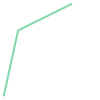

In [58]:
LineString(hola['geometry'])

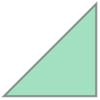

In [59]:
polygon = Polygon([(0, 0), (1, 1), (1, 0)])
polygon

In [57]:
polygon.length

3.414213562373095

#### Análisis del tiempo de trayecto (travel_time)

In [4]:
import matplotlib.pyplot as plt

NameError: name 'rides' is not defined

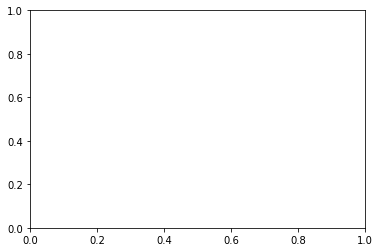

In [5]:
fig, ax = plt.subplots()
rides['travel_time'].hist(ax=ax, bins=100)
ax.set_yscale('log')

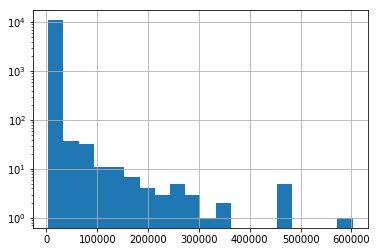

In [191]:
#Histograma de rides de más de 1 hora (menos de un 5% de los trayectos)
fig, ax = plt.subplots()
rides['travel_time'][rides.travel_time>3600].hist(ax=ax, bins=20)
ax.set_yscale('log')

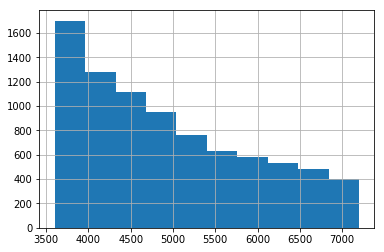

In [201]:
#Histograma de rides entre 1 y 2 horas (menos de un 5% de los trayectos)
rides['travel_time'][rides.travel_time.between(3600,7200)].hist()

In [204]:
rides['travel_time'].quantile(0.5)

717.0

In [180]:
rides['travel_time'].describe()

count    224536.000000
mean       1198.011945
std        4211.352686
min           5.000000
25%         476.000000
50%         717.000000
75%        1126.000000
max      602436.000000
Name: travel_time, dtype: float64

In [203]:
rides['travel_time'][rides.travel_time>7200].count()

2656

In [225]:
rides[rides.travel_time==rides.travel_time.max()]

,_id,ageRange,idplug_station,idunplug_station,track,travel_time,unplug_hourTime,user_day_code,user_type,zip_code,full_track
15807,5b7205452f3843505c6bd191,4,129,145,"{'type': 'FeatureCollection', 'features': [{'g...",602436,2018-08-02 08:00:00+02:00,b931c9c65605c12a9223253fba7b7690baf4a599b7c4de...,3,None,"{'type': 'FeatureCollection', 'features': [{'g..."


In [210]:
rides.travel_time.max()

602436

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
rides['travel_time'].hist(ax=ax, bins=100)
ax.set_yscale('log')

fig, ax = plt.subplots()
rides['travel_time'][rides.travel_time>3600].hist(ax=ax, bins=20)
ax.set_yscale('log')

rides['travel_time'][rides.travel_time.between(3600,7200)].hist()

rides['travel_time'].quantile(0.5)

rides['travel_time'].describe()

rides['travel_time'][rides.travel_time>7200].count()

rides[rides.travel_time==rides.travel_time.max()]

rides.travel_time.max()